# SEEK JOB SCRAPPER

In [1]:
# ----------Import required libraries----------
from PIL import Image
import requests
import pandas as pd
from bs4 import BeautifulSoup
from pandas import ExcelWriter
import matplotlib.pyplot as plt

In [2]:
# ----------scrape only normal jobs and not featured---------- 
# ----------driver code----------
def scrape_jobs(job_type):
    # ----------making the soup----------
    main_url = f'https://www.seek.com.au/data-scientist-jobs-in-science-technology/{job_type}?sortmode=ListedDate'
    req = requests.get(main_url)
    soup = BeautifulSoup(req.content, 'html.parser')
    decider = int(int(soup.find(attrs={"data-automation":"totalJobsCount"}).text)/10)
    
    # ----------deciding how many pages to scrape----------
    if decider <= 1:
        decider = 2
    sample_list = []
    
    # ----------forming the main logic----------
    for j in range(1,decider+1,1): 
        url = f'https://www.seek.com.au/data-scientist-jobs-in-science-technology/{job_type}?page={j}&sortmode=ListedDate'
        req = requests.get(url)
        soup1 = BeautifulSoup(req.content, 'html.parser')
        input_tag = soup1.find_all(attrs={"data-automation" : "normalJob"})
    #     print(len(input_tag))
        for i in input_tag:
            title = i.find(attrs={"data-automation":"jobTitle"}).text
            company = i.find(attrs={"data-automation":"jobCompany"}).text
            try:
                salary = i.find(attrs={"data-automation":"jobSalary"}).text
            except:
                salary = None
            location = i.find(attrs={"data-automation":"jobLocation"}).text
            listingDate = i.find(attrs={"data-automation":"jobListingDate"}).text
            jobLink = 'www.seek.com.au' + i.find(attrs={"data-automation":"jobTitle"})['href'] 
            jobSubDomain = i.find(attrs={"data-automation":"jobSubClassification"}).text
            try:
                jobSubLocation = i.find(attrs={"data-automation":"jobArea"}).text
            except:
                jobSubLocation = None
            pageNo = j
            sample_list.append([title,company,location,jobSubLocation,salary,listingDate,jobSubDomain,pageNo,jobLink])
    
    # ----------working on the results and that dataframe----------
    df = pd.DataFrame.from_records(sample_list)
    df.columns = ['Job Title', 'Company Name', 'Job Location', 'Job Area', 'Job Salary', 'Job Listing Date', 'Job Sub Classification', 'Page Number','Links']
    hour_before=df[df['Job Listing Date']=='1d ago']
    day_before=df[['h' in i for i in df['Job Listing Date']]]
    recents = hour_before.append(day_before)
#     print('Most Recent Jobs','\n',recents,'\n')
    job_location_sites=df['Job Location'].value_counts().sort_values(ascending=False)[:3,]
    print(f'**********{job_type} roles**********')
    print('*****Top 3 Job Locations*****','\n',job_location_sites,'\n')
    top_sub_domains=df['Job Sub Classification'].value_counts().sort_values(ascending=False)[:3,]
    print('*****Top 3 sub domains*****','\n',top_sub_domains,'\n')
    top_company=df['Company Name'].value_counts().sort_values(ascending=False)[:1,]
    print('*****The company hiring the most*****','\n',top_company,'\n')
    
    # ----------printing the bar graphs
    plt.subplot(2,1,1)
    df['Job Location'].value_counts().sort_values().plot.barh(figsize=(10, 10))
    plt.subplot(2,1,2)
    df['Job Sub Classification'].value_counts().sort_values().plot.barh(figsize=(10, 10))
    
    # ----------converting the dataframe to a csv file (will be saved in the current working directory)----------
    df.to_csv(f'data-scientist-jobs-in-science-technology-{job_type}.csv', sep=',')
    return recents


**********full-time roles**********
*****Top 3 Job Locations***** 
 Sydney       31
Melbourne    22
Brisbane     15
Name: Job Location, dtype: int64 

*****Top 3 sub domains***** 
 Mathematics, Statistics & Information Sciences    37
Environmental, Earth & Geosciences                18
Biological & Biomedical Sciences                  16
Name: Job Sub Classification, dtype: int64 

*****The company hiring the most***** 
 PwC    5
Name: Company Name, dtype: int64 



,Job Title,Company Name,Job Location,Job Area,Job Salary,Job Listing Date,Job Sub Classification,Page Number,Links


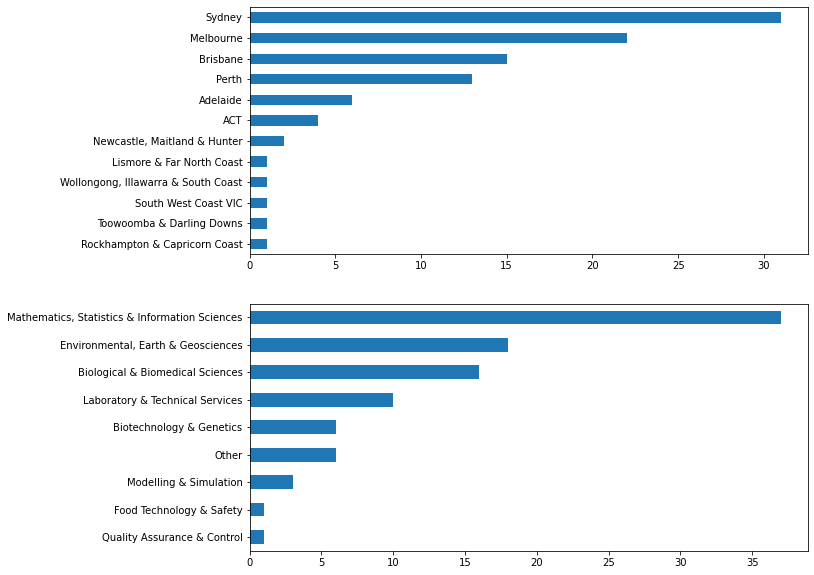

In [3]:
scrape_jobs('full-time')    

In [ ]:
scrape_jobs('part-time')

In [ ]:
scrape_jobs('contract-temp')